In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib as mpl 

# see https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/
# for more information on installing and configuring ffmpeg
mpl.rcParams['animation.ffmpeg_path'] = '/Users/rebecca/Applications/ffmpeg'

from util import rmse, rmse_by_month, plot_mean_errors, animate_predictions, animate_residuals

## Load the data and set up train and test sets

In [2]:
df = pd.read_csv("data/df_trains_ctx.csv")
df.head()

,lon,lat,TOTEXTTAU,year,month,day,date,T,offset_1,aod_offset_1,...,offset_27,aod_offset_27,offset_28,aod_offset_28,offset_29,aod_offset_29,Train_A,Test_A,Train_B,Test_B
0,-176.5625,56.5,0.155240,1988,6,1,1988-06-01,224.617438,222.868979,0.163873,...,225.573419,0.128559,226.981376,0.130827,229.257093,0.125594,True,False,True,False
1,-169.0625,56.5,0.152576,1988,6,1,1988-06-01,224.465418,222.561993,0.173268,...,225.596504,0.114420,226.593252,0.117272,229.008780,0.111849,True,False,True,False
2,-161.5625,56.5,0.156077,1988,6,1,1988-06-01,224.373630,222.352100,0.166419,...,225.560169,0.099483,225.985720,0.099029,228.609150,0.099602,True,False,True,False
3,-154.0625,56.5,0.154960,1988,6,1,1988-06-01,224.233717,222.211225,0.142224,...,225.328833,0.092641,225.208402,0.093702,227.929692,0.100677,True,False,True,False
4,-146.5625,56.5,0.133917,1988,6,1,1988-06-01,223.987277,221.979365,0.137381,...,224.791315,0.098885,224.288211,0.101869,226.916581,0.135423,True,False,True,False


In [3]:
X_offset_cols = [
    f"offset_{i}" for i in range(29,5, -1)
]

y_offset_cols = [
    f"offset_{i}" for i in range(5,0, -1)
] + ["T"]

aod_X_offset_cols = X_offset_cols + [
    f"aod_offset_{i}" for i in range(29, 5, -1)
]

X_Train_A = df[X_offset_cols][df.Train_A].values
X_Test_A = df[X_offset_cols][df.Test_A].values

X_Train_A_aod = df[aod_X_offset_cols][df.Train_A].values
X_Test_A_aod = df[aod_X_offset_cols][df.Test_A].values

y_Train_A = df[y_offset_cols][df.Train_A].values
y_Test_A = df[y_offset_cols][df.Test_A].values

X_Train_B = df[X_offset_cols][df.Train_B].values
X_Test_B = df[X_offset_cols][df.Test_B].values

X_Train_B_aod = df[aod_X_offset_cols][df.Train_B].values
X_Test_B_aod = df[aod_X_offset_cols][df.Test_B].values

y_Train_B = df[y_offset_cols][df.Train_B].values
y_Test_B = df[y_offset_cols][df.Test_B].values

# save the lat/lon/date values for test sets
# we will use this to plot predictions over time
# and on the map
test_A_labels = df[df.Test_A][["lon", "lat", "date"]]
test_B_labels = df[df.Test_B][["lon", "lat", "date"]]

## Fit a linear regression for each model

In [4]:
# training set A
lr_A = LinearRegression()
lr_A.fit(X_Train_A, y_Train_A)

y_pred_A = lr_A.predict(X_Test_A)

print(f"RMSE for training set A: {rmse(y_Test_A, y_pred_A)}.\n")

# training set A with AOD
lr_A_aod = LinearRegression()
lr_A_aod.fit(X_Train_A_aod, y_Train_A)

y_pred_A_aod = lr_A_aod.predict(X_Test_A_aod)
print(f"RMSE for training set A with AOD: {rmse(y_Test_A, y_pred_A_aod)}.\n")

# training set B
lr_B = LinearRegression()
lr_B.fit(X_Train_B, y_Train_B)

y_pred_B = lr_B.predict(X_Test_B)
print(f"RMSE for training set B: {rmse(y_Test_B, y_pred_B)}.\n")

# training set B with AOD
lr_B_aod = LinearRegression()
lr_B_aod.fit(X_Train_B_aod, y_Train_B)

y_pred_B_aod = lr_A_aod.predict(X_Test_B_aod)

print(f"RMSE for training set B with AOD: {rmse(y_Test_B, y_pred_B_aod)}.")

RMSE for training set A: 1.9243081595450733.

RMSE for training set A with AOD: 2.002961841822401.

RMSE for training set B: 1.9415206380588212.

RMSE for training set B with AOD: 2.0258624998091075.


In [5]:
# consider breakdowns by month
rmse_by_month(y_Test_A, y_pred_A)

[1.6268732463060211,
 1.8609877408777864,
 1.9243707325780008,
 1.9696405725422335,
 2.0334633112444562,
 2.1305133537219514]

In [6]:
rmse_by_month(y_Test_A, y_pred_A_aod)

[1.6457646545867313,
 1.9270276823606918,
 2.022958464708783,
 2.0733953920517947,
 2.1275373902906156,
 2.2210874669357845]

In [7]:
rmse_by_month(y_Test_B, y_pred_B)

[1.5748428083009218,
 1.8735665729247906,
 2.0017199925718474,
 2.0069823984765374,
 2.0330417837945065,
 2.1589702722843116]

In [8]:
rmse_by_month(y_Test_B, y_pred_B_aod)

[1.5886293133706186,
 1.950231630959716,
 2.1225032639038455,
 2.128939072697913,
 2.122537461610883,
 2.2423342563116706]

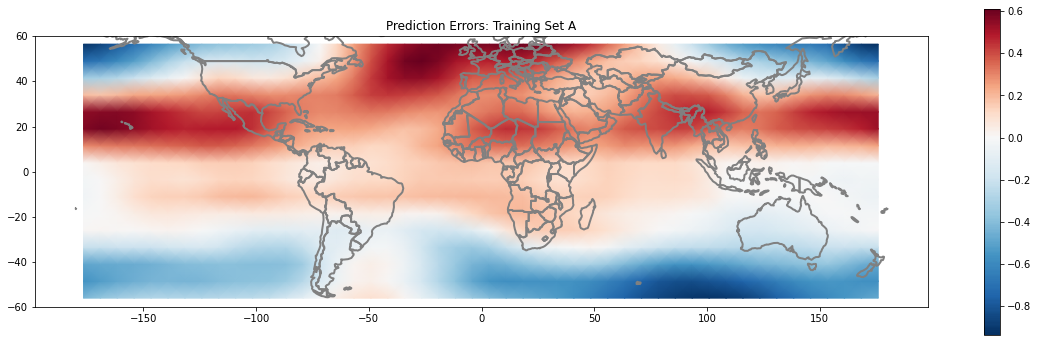

In [9]:
_ = plot_mean_errors(
    y_Test_A, 
    y_pred_A, 
    test_A_labels, 
    "Prediction Errors: Training Set A")

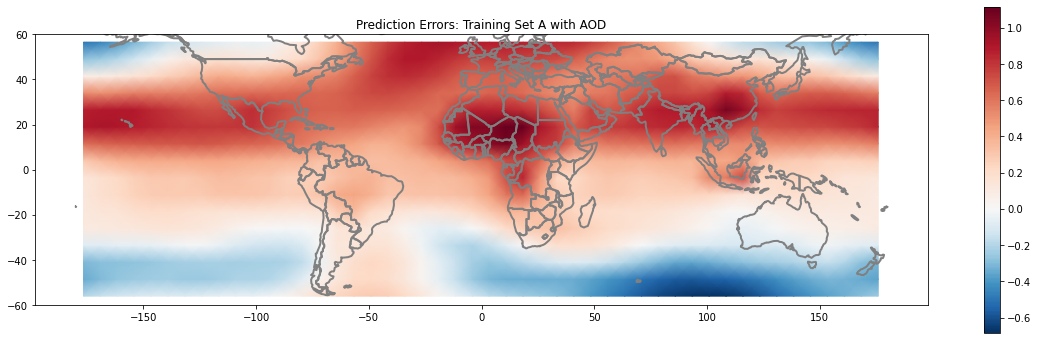

In [10]:
_ = plot_mean_errors(
    y_Test_A, 
    y_pred_A_aod, 
    test_A_labels, 
    "Prediction Errors: Training Set A with AOD")

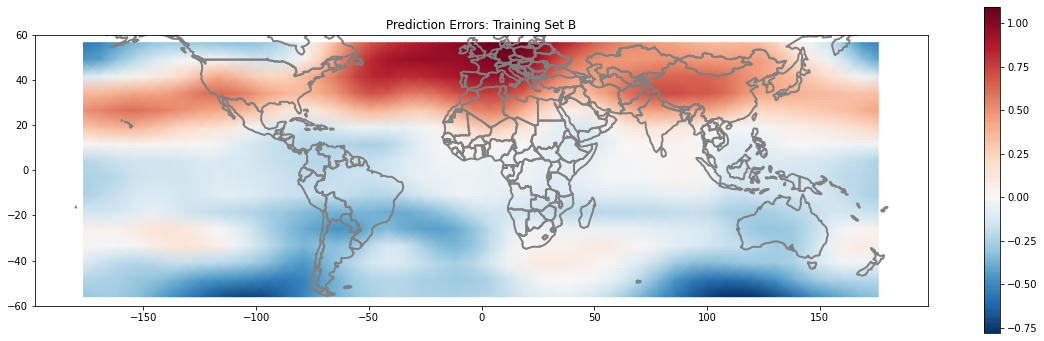

In [11]:
_ = plot_mean_errors(
    y_Test_B, 
    y_pred_B, 
    test_B_labels, 
    "Prediction Errors: Training Set B")

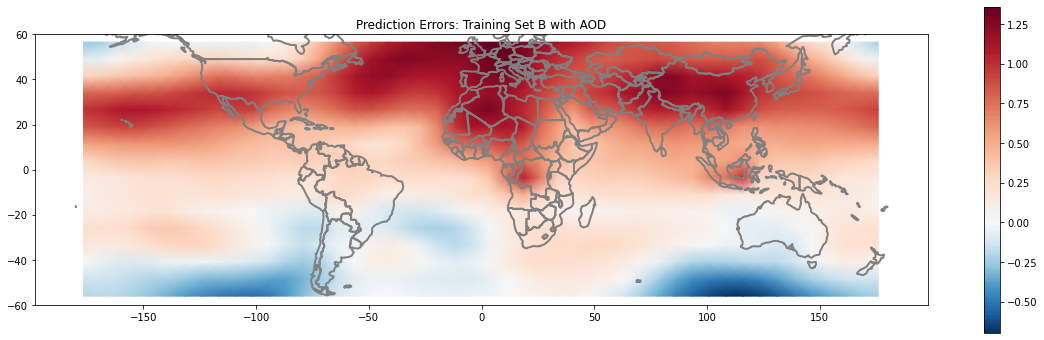

In [12]:
_ = plot_mean_errors(
    y_Test_B, 
    y_pred_B_aod, 
    test_B_labels, 
    "Prediction Errors: Training Set B with AOD")

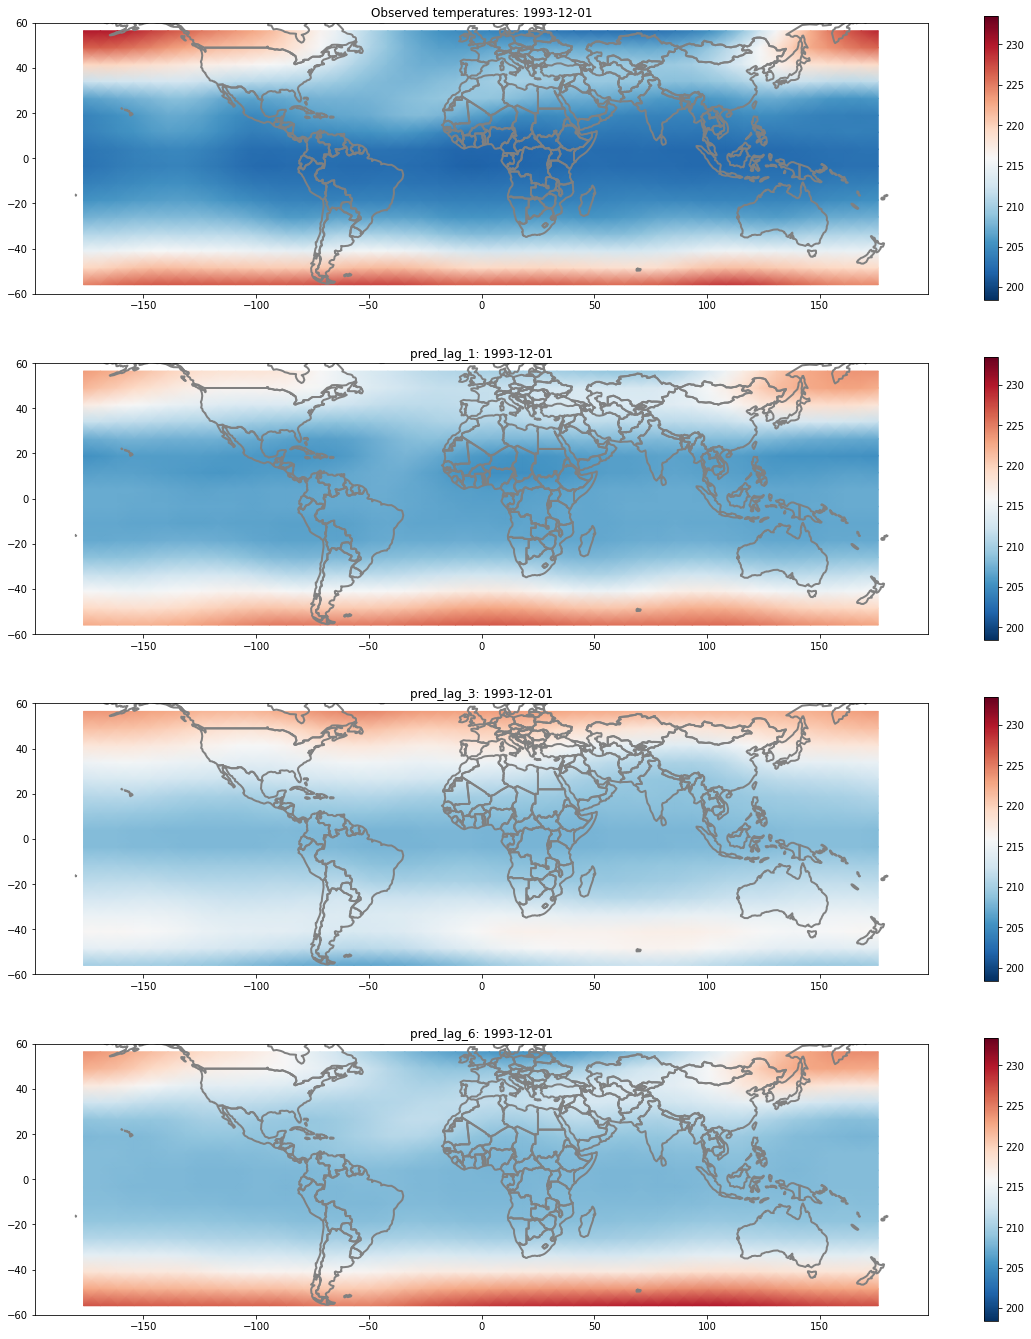

In [13]:
lags = [1,3,6]

animate_predictions(
    y_Test_A,
    y_pred_A,
    test_A_labels,
    "images/Test_A_predictions.mov",
    lags=lags
)

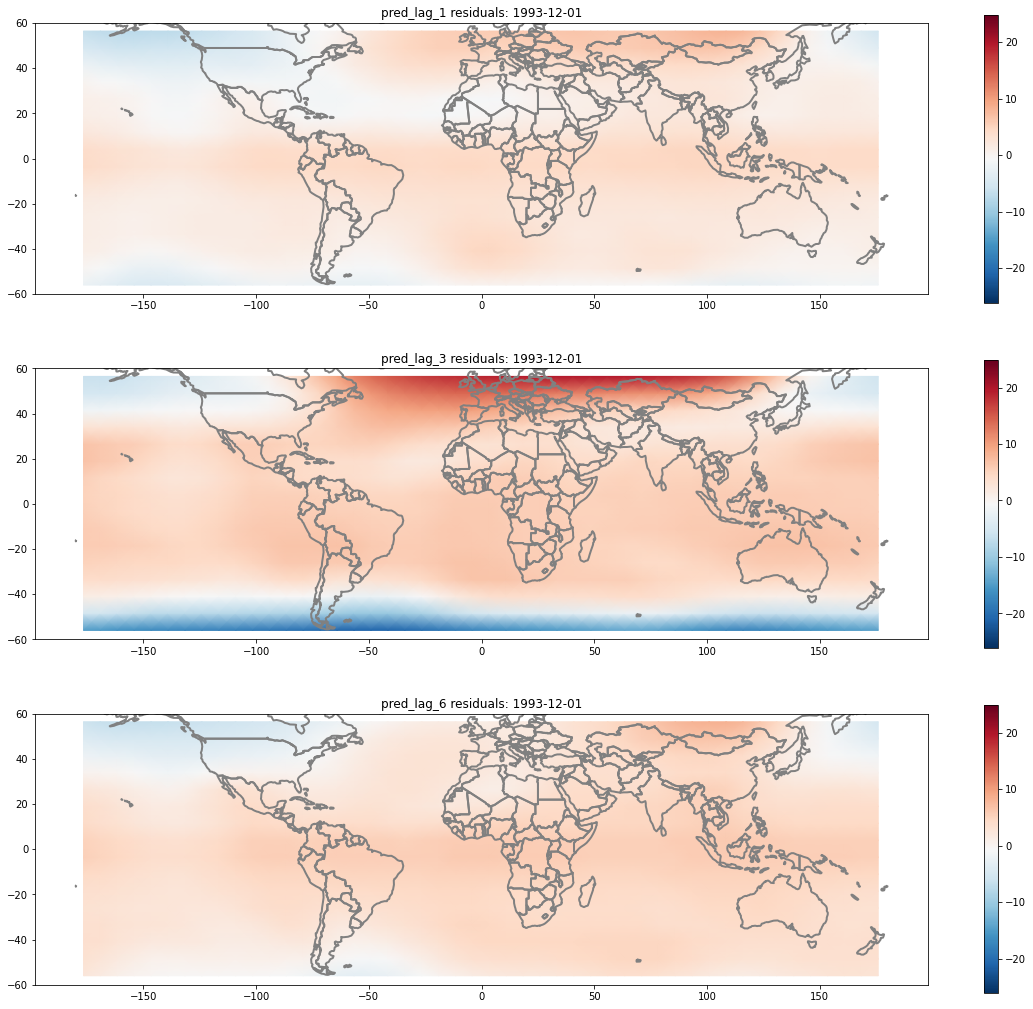

In [14]:
lags = [1,3,6]

animate_residuals(
    y_Test_A,
    y_pred_A,
    test_A_labels,
    "images/Test_A_residuals.mov",
    lags=lags
)